In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import train_test_split.
from sklearn.model_selection import train_test_split
# Import logistic regression
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
df = pd.read_csv('./datasets/train.csv')

In [3]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
# replace space with another character in column names - from https://www.geeksforgeeks.org/remove-spaces-from-column-names-in-pandas/
df.columns = df.columns.str.replace(' ', '_') 

In [4]:
# dropping columns with few data points (less than 60%) and PID (parcel ID)
df = df.drop(['Alley', 'Pool_QC', 'Fence', 'Misc_Feature', 'PID'], axis=1) 

In [5]:
# replacing NA and empty cells with np.nan
df = df.replace(['NA', ''], np.nan) 

In [6]:
df['MS_Zoning'].unique()

array(['RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)'],
      dtype=object)

In [7]:
#removing all non-residential per data dictionary
df = df[(df.MS_Zoning != 'C (all)') & (df.MS_Zoning != 'I (all)') & (df.MS_Zoning != 'A (agr)')] 

In [8]:
# creating a column for Total livable basement space to be included in total livable space:
df['Fin_Bsmt_SF'] = df['Total_Bsmt_SF'] - df['Bsmt_Unf_SF']

In [9]:
# Total Livable space column:
df['Liv_SF'] = df['Fin_Bsmt_SF'] + df['Gr_Liv_Area']

In [10]:
# Look up all years the sales took place: 
df['Yr_Sold'].unique()

array([2010, 2009, 2006, 2007, 2008])

In [11]:
# creating a colum with House Age, combining Year Sold and Year Built/Remodelled based on the data disctionary file:
df['Home_Age'] = df.apply(lambda x: x['Yr_Sold'] - x['Year_Built'] if (x['Year_Built'] < x['Year_Remod/Add']) else (x['Yr_Sold'] - x['Year_Remod/Add']), axis=1)

/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


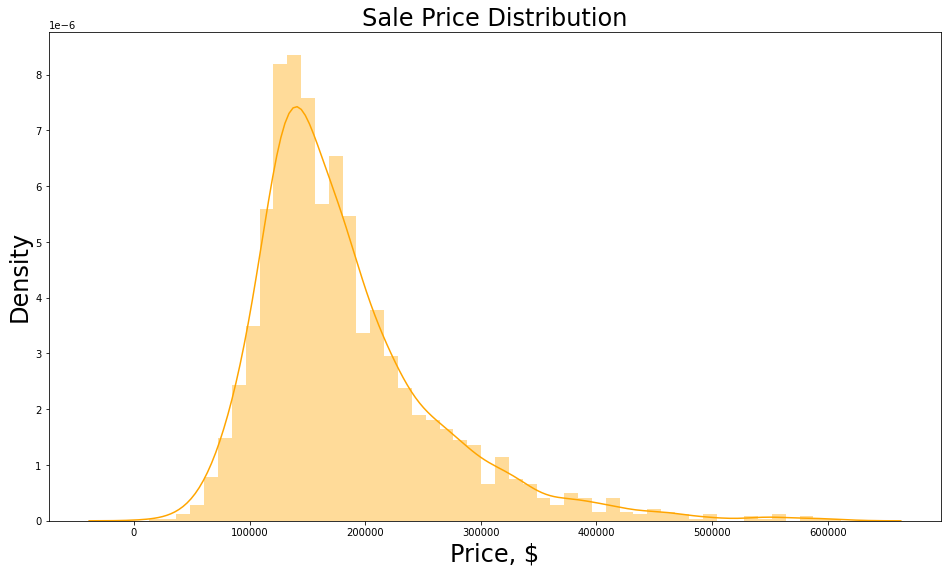

In [12]:
fig, ax = plt.subplots(figsize=(16,9))

sns.distplot(df.SalePrice, bins=50, ax=ax, color='orange')
plt.title('Sale Price Distribution', fontsize=24)
plt.xlabel('Price, $', fontsize=24);
plt.ylabel('Density', fontsize=24);

/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


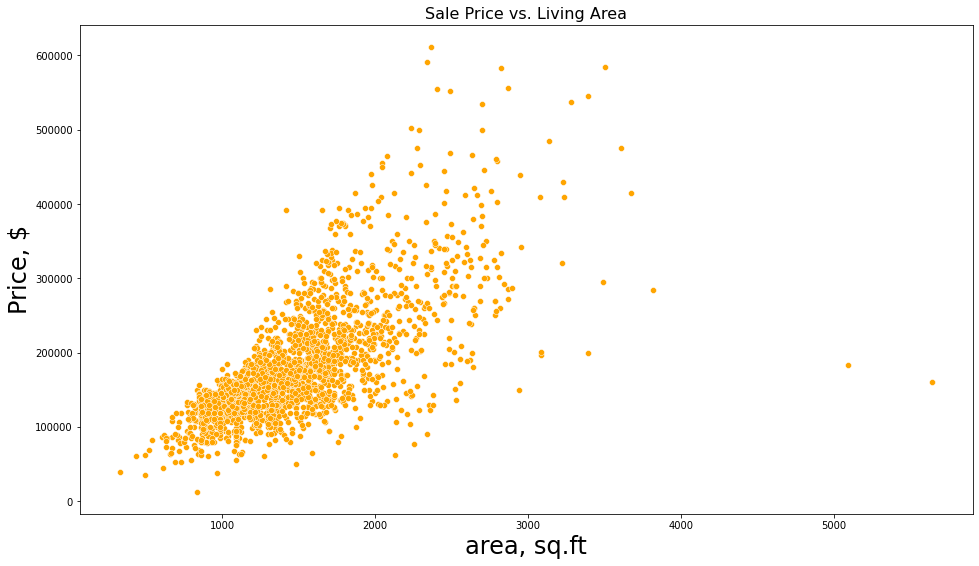

In [13]:
# Sale Price vs. Living Area
fig, ax = plt.subplots(figsize=(16,9))

sns.scatterplot(df.Gr_Liv_Area, df.SalePrice, ax=ax, color='orange')
plt.title('Sale Price vs. Living Area', fontsize=16)
plt.xlabel('area, sq.ft', fontsize=24);
plt.ylabel('Price, $', fontsize=24);

In [14]:
# clear outlier to the right - low price, huge footage. removing all over 4,000 sq.ft per instructions from data file:
df = df.drop(df[df['Gr_Liv_Area'] >= 4000].index)

In [15]:
df.isnull().sum().sort_values(ascending=True) # Can drop NA

Id                   0
Electrical           0
1st_Flr_SF           0
2nd_Flr_SF           0
Low_Qual_Fin_SF      0
                  ... 
Garage_Yr_Blt      106
Garage_Qual        106
Garage_Cond        106
Lot_Frontage       330
Fireplace_Qu       978
Length: 79, dtype: int64

In [16]:
df = df.dropna()

In [17]:
# Exporting to .CSV
df.to_csv('./train_data_clean.csv', index=False)

In [18]:
# Applying the same data cleaning/feature engineering to test data
df_test = pd.read_csv('./datasets/test.csv')

In [19]:
# replace space with another character in column names - from https://www.geeksforgeeks.org/remove-spaces-from-column-names-in-pandas/
df_test.columns = df_test.columns.str.replace(' ', '_') 

In [20]:
# dropping columns with few data points (less than 60%) and PID (parcel ID)
df_test = df_test.drop(['Alley', 'Pool_QC', 'Fence', 'Misc_Feature', 'PID'], axis=1) 

In [21]:
df_test.shape

(878, 75)

In [22]:
df_test = df_test.replace(['NA', ''], np.nan) # replacing NA and empty cells with np.nan

In [23]:
# creating a column for Total livable basement space to be included in total livable space:
df_test['Fin_Bsmt_SF'] = df_test['Total_Bsmt_SF'] - df_test['Bsmt_Unf_SF']

In [24]:
# Total Livable space column:
df_test['Liv_SF'] = df_test['Fin_Bsmt_SF'] + df_test['Gr_Liv_Area']

In [25]:
# creating a colum with House Age, combining Year Sold and Year Built/Remodelled based on the data disctionary file:
df_test['Home_Age'] = df_test.apply(lambda x: x['Yr_Sold'] - x['Year_Built'] if (x['Year_Built'] < x['Year_Remod/Add']) else (x['Yr_Sold'] - x['Year_Remod/Add']), axis=1)

In [26]:
df_test.to_csv('./test_data_clean.csv', index=False)